# Symbols and notation

Many of the aspects of maelzel.core's notation output can be customized. There are two main entry points for this: 

1. The method `setSymbol` which adds or modifies a Symbol to a Note/Chord
2. `addSpanner` adds a line/slur/bracket to two or more notes. 

## Symbols / Properties

Symbols are any elements/attributes used to customize the symbolic representation of music. A text expression, the notehead shape, an articulation:   all these are symbols. Also properties (the color of a note, its size, etc) are seen as symbols. 

In [1]:
from maelzel.core import *

Some chain symbols are applied to all elements within a chain, others are applied to the first

Chain([4C+:3/2♩:offset=2:symbols=[Color(blue)], 4A♯:5/2♩:symbols=[Color(red)]])
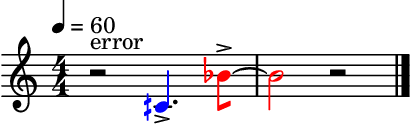

In [2]:
notes = [
    Note(60.5, dur=1.5, offset=2).setPlay(position=0), 
    Note(70, dur=2.5).setPlay(position=1)
]
notes[0].addSymbol('color', 'blue')
notes[1].addSymbol('color', 'red')

chain = Chain(notes)
chain.addSymbol(symbols.Text('error'))
chain.addSymbol(symbols.Articulation('accent'))

Chain([4C+:3/2♩:offset=2:symbols=[Color(blue), Text(text='start', placement='above')], 4A♯:5/2♩:symbols=[Color(red)]])
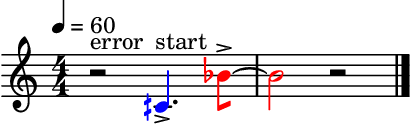

In [3]:
chain.addSymbolAt(symbols.Text("start"), 2)
chain

Chain([4C+:3/2♩:offset=2:symbols=[Color(blue), Text(text='start', placement='above')], 4A♯:5/2♩:symbols=[Color(red), Text(text='last', placement='above')]])
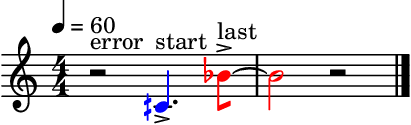

In [10]:
chain.lastEvent().addSymbol(symbols.Text("last"))
chain

Calls to `addSymbol` can be chained. 

[Notehead(color=red, size=1.4), Accidental(parenthesis=True), Articulation(accent)]


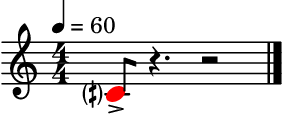

In [4]:
from maelzel.core import symbols 

n = Note(60.5, dur=0.5)

n.addSymbol('notehead', color='red', size=1.4).addSymbol('accidental', parenthesis=True)
n.addSymbol(symbols.Articulation('accent'))
print(n.symbols)
n.show()

Notice the difference between resizing the notehead alone and resizing the note itself

4C+:1/2♩:symbols=[SizeFactor(1.4), Accidental(parenthesis=True), Articulation(accent)]
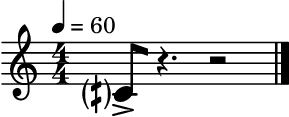

In [5]:
n = Note(60.5, dur=0.5)
n.addSymbol(symbols.SizeFactor(1.4))
n.addSymbol(symbols.Accidental(parenthesis=True))
n.addSymbol('accent')
n

Some symbols can be accumulated, others are exclusive (a new value will take over any previous value set)

| Symbol       | Exclusive? |
|--------------|------------|
| Color        | Yes        |
| SizeFactor   | Yes        |
| Articulation | Yes        |
| Notehead     | Yes        |
| Text         | No         |

**NB**: dynamics are not symbols. They are treated as a constituent part of a note/chord

Color, for example, is exclusive. Only the last call to `setSymbol('color', ...)` has effect, the previous ones are overwritten  

4G+:2♩:symbols=[Color(red)]
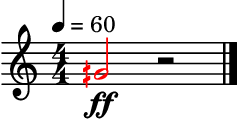

In [13]:
Note("4G+", dur=2, dynamic='ff').addSymbol('color', 'blue').addSymbol('color', 'red')

Text symbols, on the other hand, can be accumulated (notice the order of appearance)

4G+:2♩:symbols=[Text(text='text1', placement='above'), Text(text='text2', placement='above')]
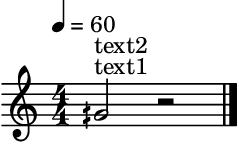

In [14]:
Note("4G+", dur=2).addSymbol(symbols.Text('text1')).addSymbol(symbols.Text('text2'))

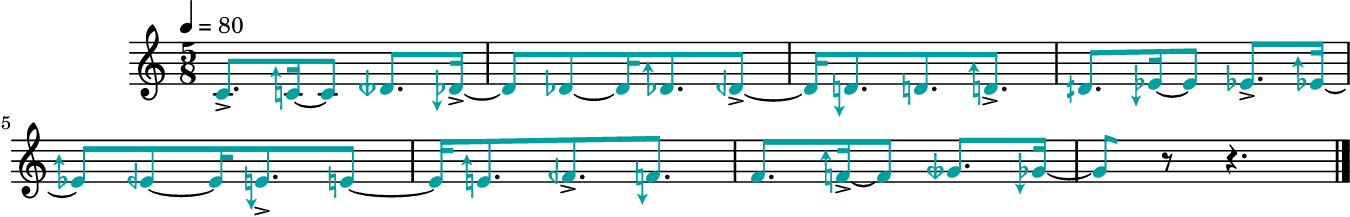

OfflineRenderer(sr=44100)
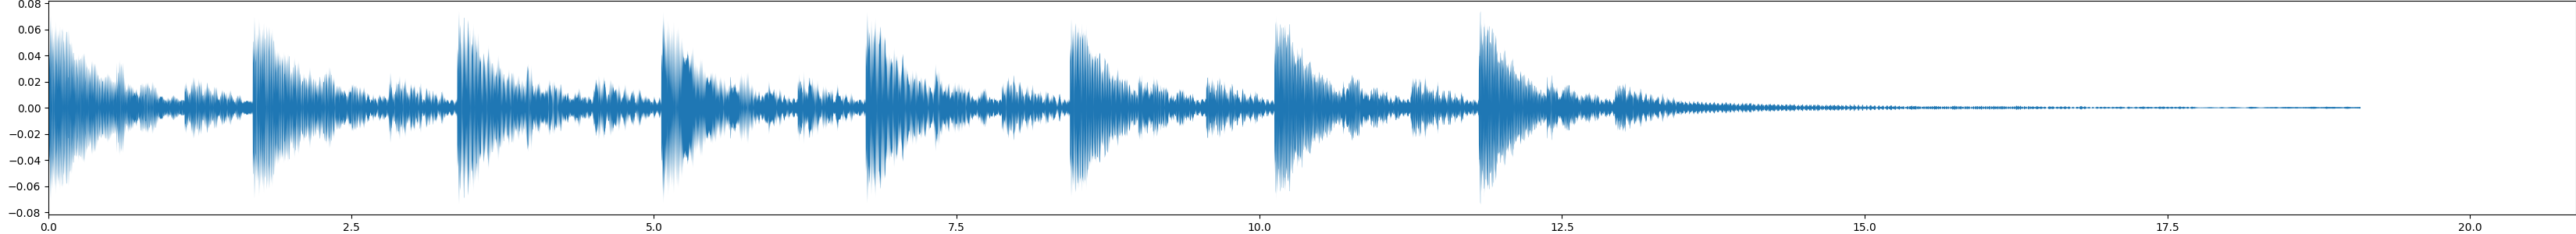

In [26]:
from IPython.display import display 

w = Workspace(scorestruct=ScoreStruct('5/8', tempo=80), active=True)
ch = Chain([Note(60+m*0.25, dur=F(3,4)) for m in range(24)])
ch.addSymbol('#00A0A0')
ch.setPlay(fade=(0, 0.15), instr='.piano')
for n in ch:
    n.setPlay(gain=0.3)
for n in ch[::3]:
    n.addSymbol('accent')
    n.setPlay(gain=1, sustain=8)
ch.show()
ch.rec(extratime=0.5, nchnls=1)


Chain([4C:1/2♩, 4C♯:1/2♩, 4D:1/2♩, 4D♯:1/2♩, 4E:1/2♩, 4F:1/2♩, 4F♯:1/2♩, 4G:1/2♩, 4G♯:1/2♩, 4A:1/2♩, …])
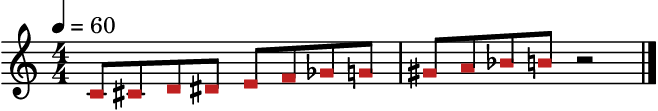

In [3]:
ch = Chain([Note(m, dur=0.5) for m in range(60, 72)])
ch.addSymbol(symbols.Notehead('square', color='#c02020'))
ch

Chain([4C:1/4♩:symbols=[Notehead(color=#000000, size=1.5)], 4C♯:1/4♩:symbols=[Notehead(color=#0a0a0a, size=1.4167)], 4D:1/4♩:symbols=[Notehead(color=#151515, size=1.3333)], 4D♯:1/4♩:symbols=[Notehead(color=#1f1f1f, size=1.25)], 4E:1/4♩:symbols=[Notehead(color=#2a2a2a, size=1.1667)], 4F:1/4♩:symbols=[Notehead(color=#353535, size=1.0833)], 4F♯:1/4♩:symbols=[Notehead(color=#3f3f3f, size=1)], 4G:1/4♩:symbols=[Notehead(color=#4a4a4a, size=0.91667)], 4G♯:1/4♩:symbols=[Notehead(color=#555555, size=0.83333)], 4A:1/4♩:symbols=[Notehead(color=#5f5f5f, size=0.75)], …])
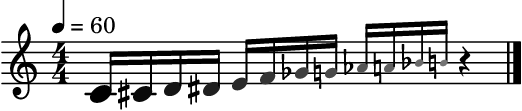

In [4]:
def rgbtohex(r, g, b):
    return '#%02x%02x%02x'% (r, g, b)
    
ch = Chain([Note(m, 0.25) for m in range(60, 72)])
for i, n in enumerate(ch):
    di = i/len(ch)
    r = di*0.5
    col = rgbtohex(int(255*r), int(255*r), int(255*r))
    n.addSymbol('notehead', color=col, size=0.5+(1-di)*1.0)
ch